In [1]:
import pyspark

In [2]:
import CommentsFileFetcher

In [3]:
from CommentsSchema import *

In [4]:
comment_data_files = CommentsFileFetcher.getCommentsData(2009, 12)

In [5]:
print(comment_data_files)

['/home/sravyakatamneni/Spark/CommentsData/RC_2009-12.bz2']


In [6]:
comments_data = sc.textFile(comment_data_files[0])

In [7]:
first_line = comments_data.first()

In [8]:
print(first_line)

{"id":"c0gi2dc","score":22,"archived":true,"parent_id":"t3_a9lec","retrieved_on":1428165119,"name":"t1_c0gi2dc","link_id":"t3_a9lec","created_utc":"1259625600","ups":22,"downs":0,"distinguished":null,"score_hidden":false,"edited":false,"gilded":0,"body":"Gimme that Christian side hug!","controversiality":0,"author":"GPtheMag","subreddit_id":"t5_2qh0u","author_flair_css_class":null,"author_flair_text":null,"subreddit":"pics"}


In [9]:
schema = Schema.get()

In [10]:
df_rdd = sqlContext.read.json(comments_data)

In [11]:
df_user_subreddit_ups = df_rdd.select(Schema.Author, Schema.Ups, Schema.Subreddit)

In [12]:
df_pd_user_subreddit_ups = df_user_subreddit_ups.toPandas()

In [13]:
df_pd_user_subreddit_ups.describe()

,ups
count,2.560510e+06
mean,4.244312e+00
std,2.295095e+01
min,-1.096000e+03
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,1.477600e+04


In [14]:
df_pd_user_subreddit_ups.head(5)

,author,ups,subreddit
0,GPtheMag,22,pics
1,junkeee999,2,politics
2,ThePnuts,1,AskReddit
3,dmuma,12,IAmA
4,jan,3,technology


In [15]:
import numpy as np

In [17]:
df_pd_user_subreddit_ups.groupby(Schema.Subreddit)[Schema.Author].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

,subreddit,count
60,AskReddit,558862
1731,reddit.com,269354
1649,pics,170566
1667,politics,129555
344,IAmA,118689
1207,gaming,112187
724,WTF,94708
832,atheism,75507
1190,funny,69888
1803,science,67477


In [16]:
df_ups_subr = df_pd_user_subreddit_ups.groupby(Schema.Subreddit)[Schema.Ups].sum().reset_index(name='sum').sort_values(['sum'], ascending=False)

In [17]:
df_ups_subr.head(5)

,subreddit,sum
60,AskReddit,2815655
1731,reddit.com,1321171
1649,pics,926266
344,IAmA,560859
724,WTF,550216


In [18]:
df_ups_subr.tail(5)

,subreddit,sum
1464,malkovich,-32
1648,pic,-53
1957,thereligionofpeace,-229
593,RacistReddit,-233
329,HealthProject,-2329


In [19]:
import BarPlotter

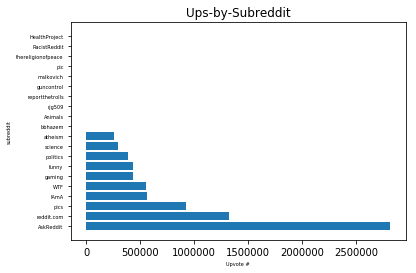

In [20]:
BarPlotter.plot_barh(df_ups_subr, 'subreddit', 'sum','Ups-by-Subreddit','subreddit','Upvote #')

In [21]:
df_ups_user = df_pd_user_subreddit_ups.groupby(Schema.Author)[Schema.Ups].sum().reset_index(name='sum').sort_values(['sum'], ascending=False)

In [22]:
import BarPlotter

In [23]:
df_ups_user.head(5)

,author,sum
27282,[deleted],2273339
21242,Scarker,18497
18199,P-Dub,17714
33986,big80smullet,12541
29710,amazingkris,11937


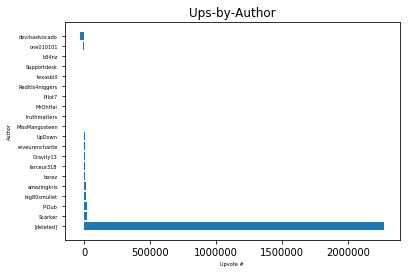

In [24]:
BarPlotter.plot_barh(df_ups_user, 'author', 'sum','Ups-by-Author', 'Author', 'Upvote #')

In [25]:
df_ups_user_clean = df_ups_user.loc[df_ups_user['author'] != '[deleted]']

In [26]:
df_ups_user_clean.head(5)

,author,sum
21242,Scarker,18497
18199,P-Dub,17714
33986,big80smullet,12541
29710,amazingkris,11937
35562,borez,9313


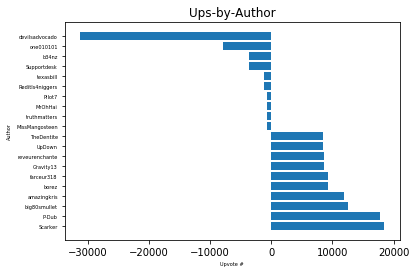

In [27]:
BarPlotter.plot_barh(df_ups_user_clean, 'author', 'sum','Ups-by-Author', 'Author', 'Upvote #')

In [28]:
import BarPlotter as bp2

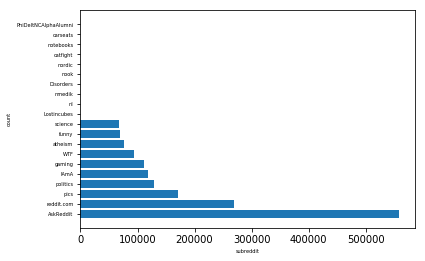

In [46]:
bp2.plot_barh(df_ups_user, 'subreddit', 'count', 'Comments-by-sub')